# 第2章 スカラー移流方程式（数値計算法の基礎）

# 2.5 数値流束と高次精度化の考え方

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def init(q1, q2, dx, jmax):
    x = np.linspace(0, dx * (jmax-1), jmax)
    q = np.array([(float(q1) if i < 0.5 * jmax else float(q2)) for i in range(jmax)])
    return (x, q)

数値流束

In [3]:
def UPWIND1(q, c, dt, dx, j):
    return c * q[j]  # 式(2.37)

In [4]:
def UPWIND2(q, c, dt, dx, j):
    return c * (1.5 * q[j] - 0.5 * q[j - 1]) # 式(2.38)

メインループ（計算＋可視化）

In [5]:
def do_computing(x, q, c, dt, dx, nmax, ff, order = 1, interval = 2, ylim = None, yticks = None):
    plt.figure(figsize=(7,7), dpi=100) # グラフのサイズ
    plt.rcParams["font.size"] = 22 # グラフの文字サイズ
    
    # 初期分布の可視化
    plt.plot(x, q, marker='o', lw=2, label='n=0') 
    
    for n in range(1, nmax + 1):
        qold = q.copy()
        for j in range(order, jmax - order):
            ff1 = ff(qold, c, dt, dx, j)
            ff2 = ff(qold, c, dt, dx, j-1)
            q[j] = qold[j] - dt / dx * (ff1 - ff2)

        # 各ステップの可視化
        if n % interval == 0:
            plt.plot(x, q, marker='o', lw=2, label=f'n={n}')

    # グラフの後処理
    plt.grid(color='black', linestyle='dashed', linewidth=0.5)
    plt.xlabel('x')
    plt.ylabel('q')
    plt.legend()
    if ylim is not None:
        plt.ylim(ylim)
    if yticks is not None:
        plt.yticks(yticks)
    plt.show()

## [1] 情報伝搬の方向がわかっている場合 ($c>0$の場合)

1次精度風上差分法

In [6]:
c = 1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax)

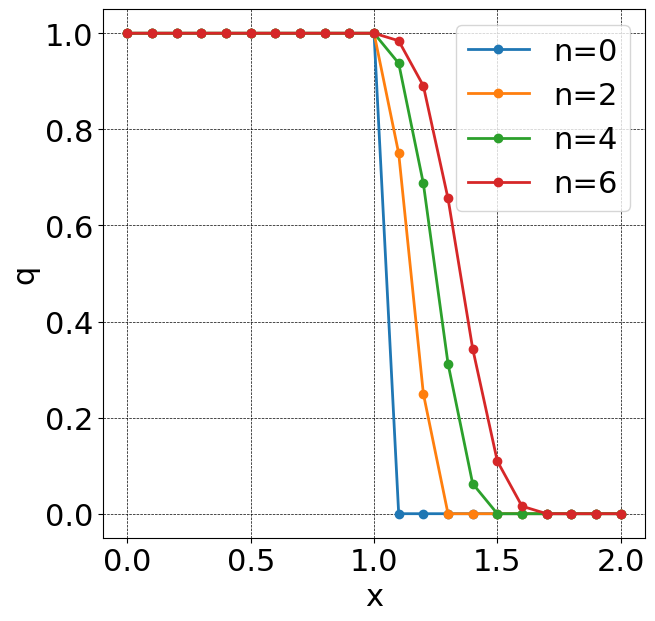

In [7]:
do_computing(x, q, c, dt, dx, nmax, UPWIND1, order = 1, interval = 2)

2次精度風上差分法

In [8]:
c = 1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax)

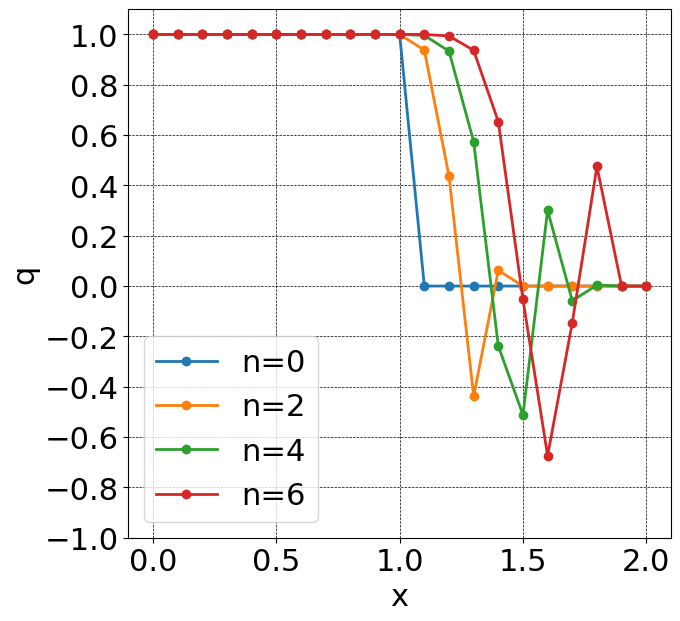

In [9]:
do_computing(x, q, c, dt, dx, nmax, UPWIND2, order = 2, interval = 2, \
             ylim = [-1, 1.1], \
             yticks = np.arange(-1, 1.1, 0.2))

## [2] 情報伝搬の方向が不明な場合

In [10]:
def UPWIND1(q, c, dt, dx, j):
    ur = q[j + 1]
    ul = q[j]
    fr = c * ur # 式(2.40a)
    fl = c * ul # 式(2.40a)
    return 0.5 * (fr + fl - abs(c) * (ur - ul)) # 式(2.39)

In [11]:
def UPWIND2(q, c, dt, dx, j):
    ur = 1.5 * q[j+1] - 0.5 * q[j+2]
    ul = 1.5 * q[j] - 0.5 * q[j-1]
    fr = c * ur # 式(2.40b)
    fl = c * ul # 式(2.40b)
    return 0.5 * (fr + fl - abs(c) * (ur - ul)) # 式(2.39)

### 1次精度

In [12]:
c = 1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax)

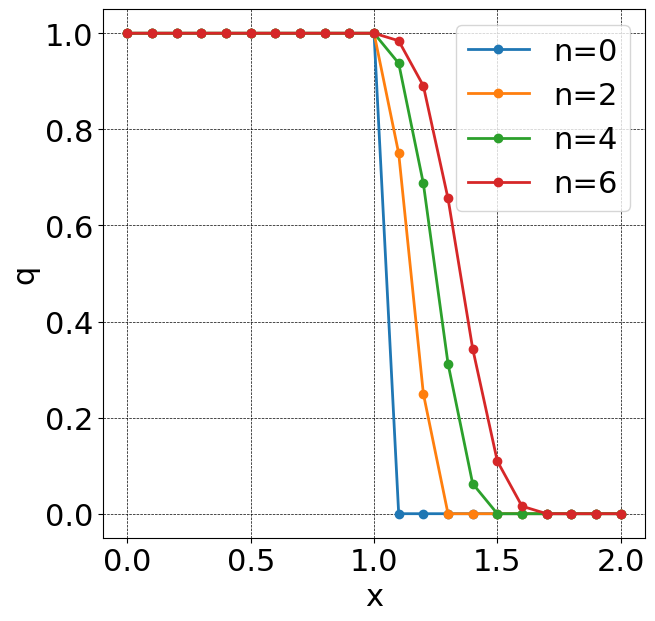

In [13]:
do_computing(x, q, c, dt, dx, nmax, UPWIND1, order = 1, interval = 2)

In [14]:
c = -1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

q1 = 0
q2 = 1
x, q = init(q1, q2, dx, jmax)

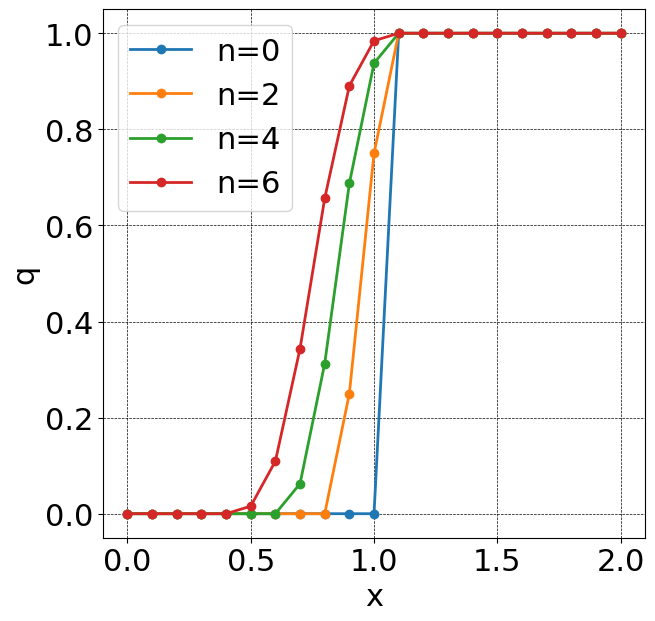

In [15]:
do_computing(x, q, c, dt, dx, nmax, UPWIND1, order = 1, interval = 2)

### 2次精度

In [16]:
c = 1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax)

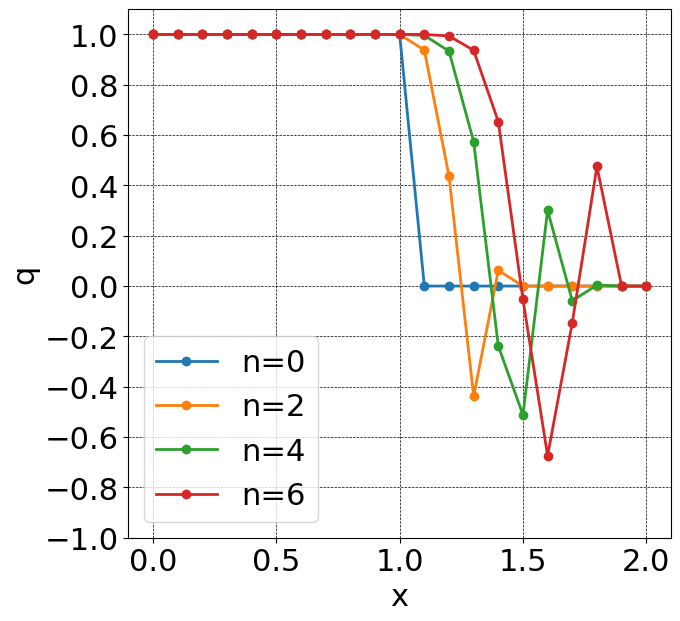

In [17]:
do_computing(x, q, c, dt, dx, nmax, UPWIND2, order = 2, interval = 2, \
             ylim = [-1, 1.1], \
             yticks = np.arange(-1, 1.1, 0.2))

In [18]:
c = -1
dt = 0.05
dx = 0.1

jmax = 21
nmax = 6

q1 = 0
q2 = 1
x, q = init(q1, q2, dx, jmax)

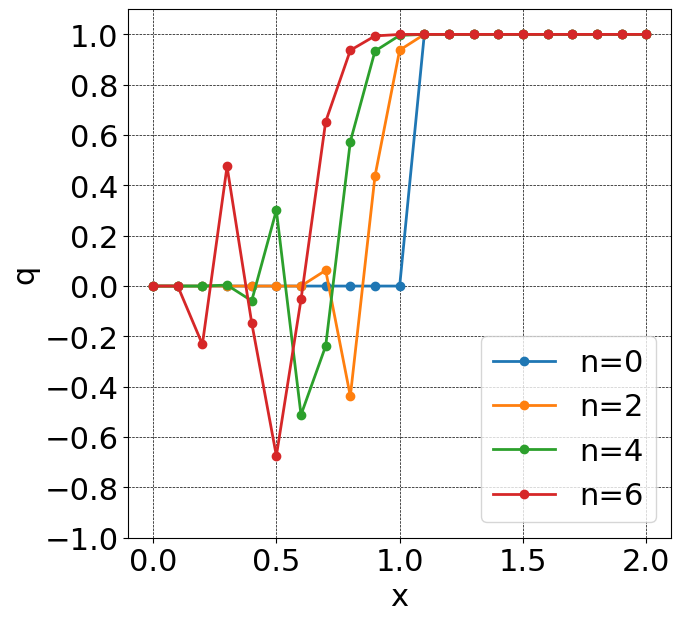

In [19]:
do_computing(x, q, c, dt, dx, nmax, UPWIND2, order = 2, interval = 2, \
             ylim = [-1, 1.1], \
             yticks = np.arange(-1, 1.1, 0.2))